In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## DATA LOADING

In [27]:
df=pd.read_csv(r"C:\Users\HP\Downloads\archive (2)\Heart_Disease_Prediction.csv")

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


## DATA CLEANING AND PREPROCESSING

In [28]:
# To convert the categorical values to numerical values
df.loc[df['Heart Disease'] == 'Presence','Heart Disease'] = 0
df.loc[df["Heart Disease"] == 'Absence','Heart Disease'] = 1

In [29]:
# Check dtype on the column Heart Disease and convert it into integers
print(df['Heart Disease'].dtype)

df['Heart Disease'] = df['Heart Disease'].astype(int)

object


In [30]:
df['Heart Disease'].dtype  # dtype changed from object to integers

dtype('int64')

In [7]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,0
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,0
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


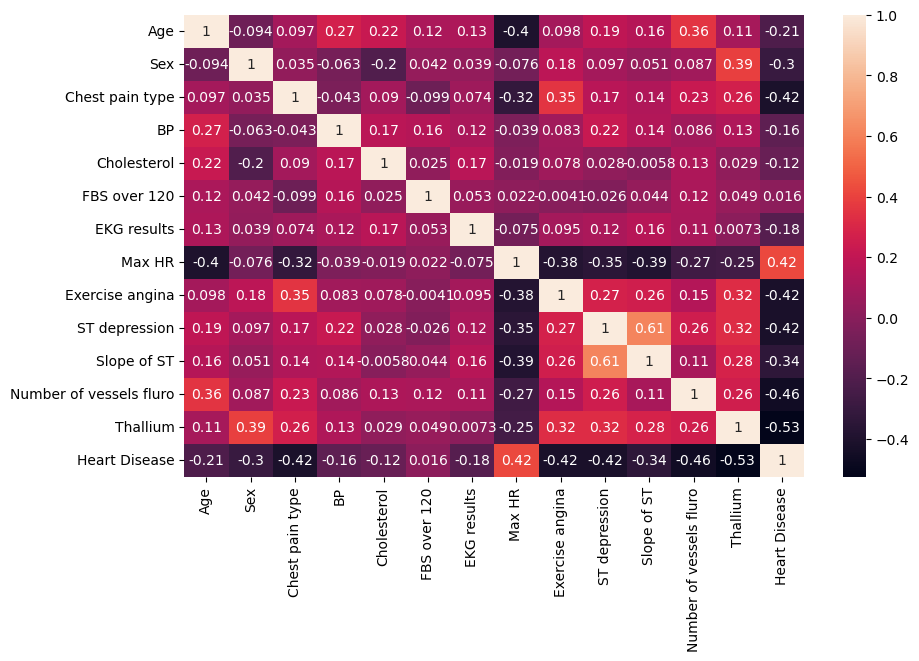

In [8]:
# To check the correlation between the variables
corr=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.show()

In [9]:
# Drop the column which has very week correlation with the label
df.drop('FBS over 120',axis=1,inplace=True)

## EDA

### Target variable Analysis

#### Count plot_1

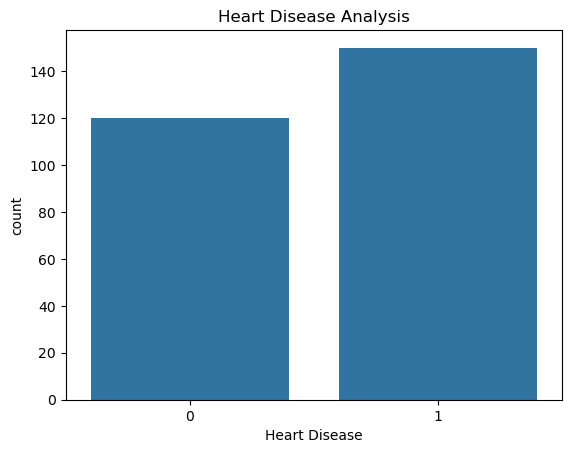

In [56]:
sns.countplot(x='Heart Disease', data=df)
plt.title('Heart Disease Analysis')
plt.show()

<p>The dataset shows a higher proportion of individuals without heart disease compared to those with the condition, indicating mild class imbalance that should be considered during model evaluation.</p>

### Demographic Analysis

#### Count plot_2

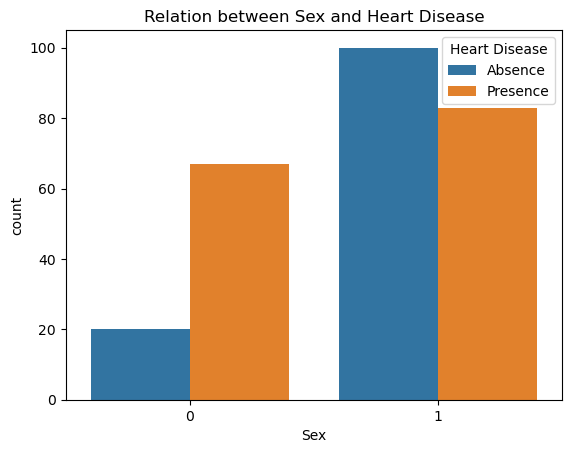

In [55]:
sns.countplot(x='Sex', hue='Heart Disease', data=df)
plt.legend(
    title='Heart Disease',
    labels=['Absence', 'Presence'])
plt.title('Relation between Sex and Heart Disease')
plt.show()

<p>The count plot comparing sex with heart disease status reveals a clear disparity between genders. Male participants not only dominate the dataset but also account for a higher number of heart disease cases compared to females. This indicates a potential association between sex and heart disease prevalence, making sex a relevant feature for predictive modeling</p>

#### Box plot_1

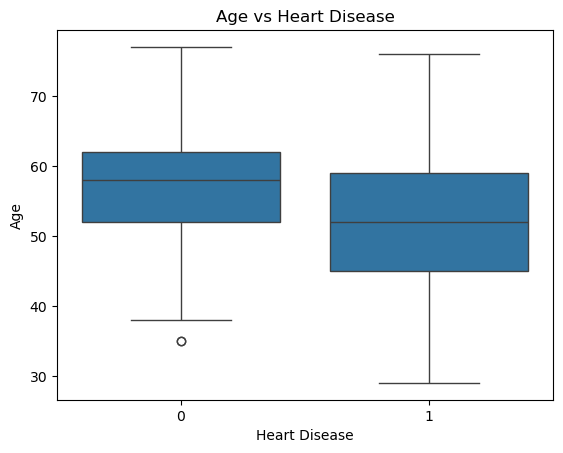

In [57]:
sns.boxplot(x='Heart Disease', y='Age', data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.title('Age vs Heart Disease')
plt.show()

<p>The box plot shows that the median age for patients with heart disease is approximately 60 years, indicating that heart disease is more common among older individuals.</p>

### Clinical Feature Analysis

#### Box plot_2

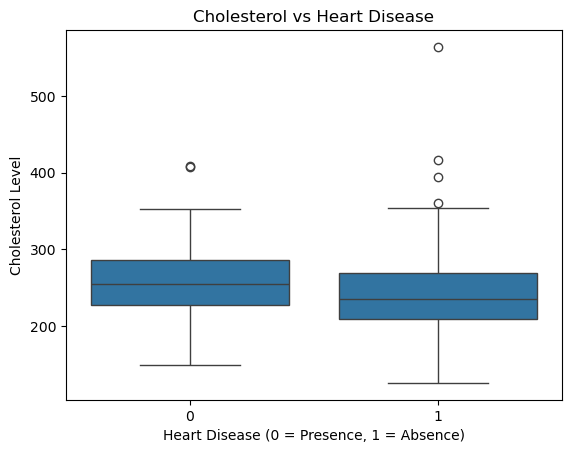

In [11]:
sns.boxplot(x='Heart Disease', y='Cholesterol', data=df)

plt.xlabel('Heart Disease (0 = Presence, 1 = Absence)')
plt.ylabel('Cholesterol Level')
plt.title('Cholesterol vs Heart Disease')
plt.show()

<p>The box plot compares the distribution of cholesterol levels between individuals with and without heart disease. Individuals with heart disease (1) tend to have higher median cholesterol levels compared to those without heart disease (0), indicating a possible association between elevated cholesterol and heart disease. This distribution suggests cholesterol may be a moderately informative feature but should be combined with other variables for accurate heart disease prediction.</p>

#### Box plot_3

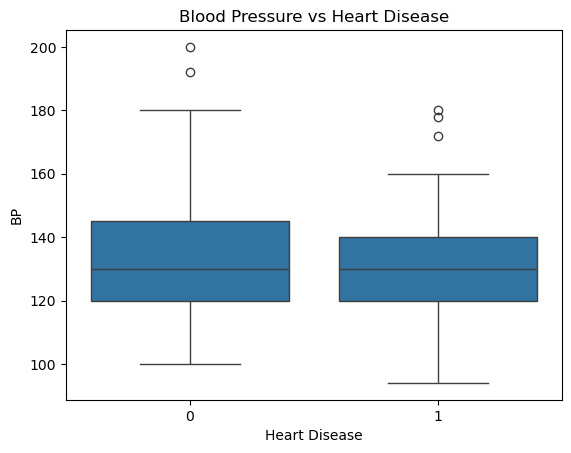

In [58]:
sns.boxplot(x='Heart Disease', y='BP', data=df)
plt.xlabel('Heart Disease')
plt.ylabel('BP')
plt.title('Blood Pressure vs Heart Disease')
plt.show()

<p>Although most blood pressure values fall within a moderate range, the presence of high-blood-pressure outliers suggests that extreme blood pressure levels may contribute to heart disease risk and should be handled carefully during model training.</p>

#### Box plot_4

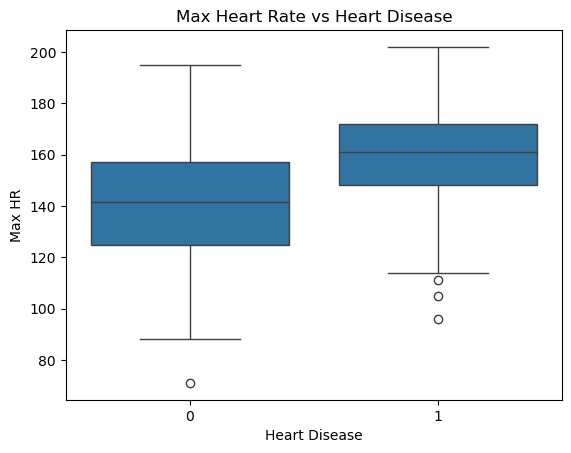

In [62]:
sns.boxplot(x='Heart Disease', y='Max HR', data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Max HR')
plt.title('Max Heart Rate vs Heart Disease')
plt.show()

<p>Higher maximum heart rates are strongly associated with the absence of heart disease, likely reflecting better cardiovascular efficiency. Conversely, lower maximum heart rates serve as a key predictor for heart disease, potentially indicating limited cardiac reserve.</p>

#### Count plot_3

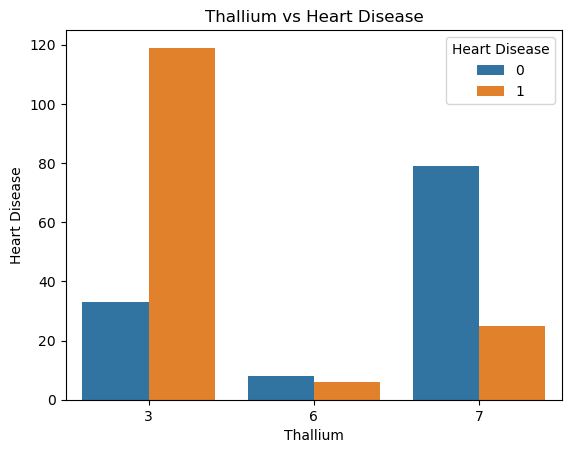

In [64]:
sns.countplot(x='Thallium', hue='Heart Disease', data=df)
plt.xlabel('Thallium')
plt.ylabel('Heart Disease')
plt.title('Thallium vs Heart Disease')
plt.savefig('Thallium vs HEart Disease.png')
plt.show()

<p>A Thallium value of 3 (Normal) is a strong indicator of health, while 7 (Reversible Defect) is highly predictive of heart disease. Because these categories show a clear, non-linear split in the target variable, this feature will likely be one of our model's most significant predictors.</p>

### Relationship Analysis

#### Pairplot

<Figure size 1500x1000 with 0 Axes>

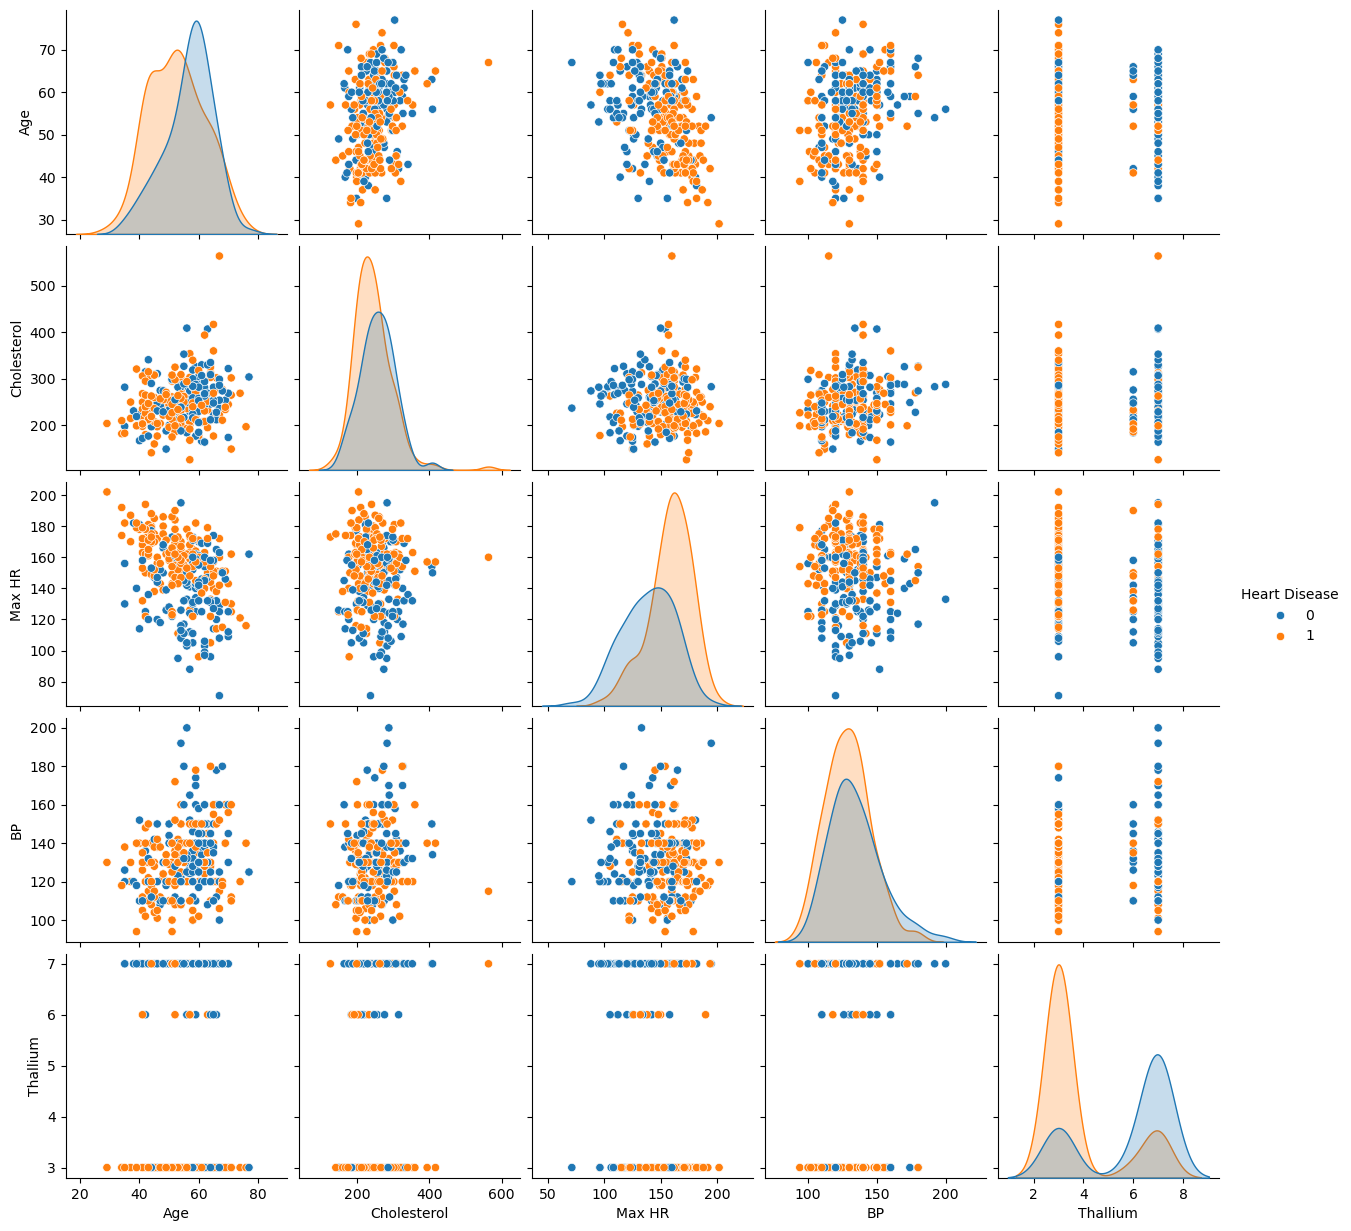

In [69]:
plt.figure(figsize=(15,10))
sns.pairplot(df[['Age','Cholesterol','Max HR','BP','Thallium','Heart Disease']], hue='Heart Disease')
plt.savefig('Relationship Analysis.png')
plt.show()

<p>Higher maximum heart rates and "Normal" Thallium scores (value 3) are strong indicators of heart health, while lower heart rates and "Reversible Defects" (value 7) correlate heavily with disease presence. While Age and Max HR show a clear negative correlation, features like Cholesterol and Blood Pressure exhibit significant overlap, suggesting they are less discriminative on their own. These patterns indicate that Thallium and Max HR will likely be the most influential features for your model's predictive accuracy.</p>

## TRAIN-TEST SPLIT

In [72]:
X = df.drop('Heart Disease',axis = 1)
y = df['Heart Disease']

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [73]:
X_train.head()

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
249,60,1,4,145,282,2,142,1,2.8,2,2,7
112,60,0,4,158,305,2,161,0,0.0,1,0,3
87,59,1,1,178,270,2,145,0,4.2,3,0,7
124,54,1,3,125,273,2,152,0,0.5,3,1,3
82,58,1,4,150,270,2,111,1,0.8,1,0,7


In [34]:
y_train.head()

249    0
112    0
87     1
124    1
82     0
Name: Heart Disease, dtype: object

In [38]:
# COnvert the object data type of y_train to int and check it
y_train = y_train.astype(int)

print(y_train.dtype)

int64


## MODELLING

###  LOGISTIC REGRESSION

In [39]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(max_iter=2000)
modelLR.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [40]:
y_pred =modelLR.predict(X_test)

In [46]:
# To convert bothe y_train and and y_test in int
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train) # fit on train
y_test  = le.transform(y_test)  # transform test

In [47]:
# To calculate the accuracy score and confusion matrix
# To get classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print(classification_report(y_test, y_pred))

Accuracy: 0.7777777777777778
Confusion Matrix:
 [[15  8]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.71        23
           1       0.77      0.87      0.82        31

    accuracy                           0.78        54
   macro avg       0.78      0.76      0.77        54
weighted avg       0.78      0.78      0.77        54



### Gaussian NB

In [48]:
from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train)

y_pred = modelGNB.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7777777777777778


### KNeighbors Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier

modelKC = KNeighborsClassifier(n_neighbors=5)
modelKC.fit(X_train, y_train)

y_pred = modelKC.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6111111111111112


### Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

modelDTC = DecisionTreeClassifier(random_state=42)
modelDTC.fit(X_train, y_train)

y_pred = modelDTC.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7407407407407407


### Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

modelRFC = RandomForestClassifier(n_estimators=100, random_state=42)
modelRFC.fit(X_train, y_train)

y_pred = modelRFC.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7777777777777778


### SVC

In [52]:
from sklearn.svm import SVC

modelSVC = SVC(kernel='rbf')
modelSVC.fit(X_train, y_train)

y_pred = modelSVC.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6851851851851852


### Gradient Boosting Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

modelG = GradientBoostingClassifier()
modelG.fit(X_train, y_train)

y_pred = modelG.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8148148148148148


## Save Best Model

In [54]:
import joblib
joblib.dump(modelG,'Best_model.pkl')

['Best_model.pkl']

<p>The objective of this project was to predict/classify Heart Disease using Heart_Disease_Prediction.csv and identify the most suitable machine learning model. Multiple models including Logestic Regression, Gaussian NB, KNeighbors Classifier, Decision Tree, Random Forest, Support Vector Classifier and Gradient Boosting Classifier were trained and evaluated. Models were evaluated using accuracy on the test dataset. Among all models, the Gradient Boosting Classifier achieved the highest accuracy of 81.48%. Therefore, based on comparative analysis and evaluation metrics, 'Best_model.pkl' is concluded to be the best-fit model for this problem and can be effectively used for future predictions.</p>